In [1]:
from scipy import io
import os
import numpy as np
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
%matplotlib inline

dat = io.loadmat('6845348/natimg2800_M170714_MP032_2017-09-14.mat')

resp = dat['stim'][0]['resp'][0] # stim x neurons
spont = dat['stim'][0]['spont'][0] # timepts x neurons
istim = (dat['stim'][0]['istim'][0]).astype(np.int32) # stim ids 
istim -= 1 # get out of MATLAB convention
istim = istim[:,0]
nimg = istim.max() # these are blank stims (exclude them)
resp = resp[istim<nimg, :]
istim = istim[istim<nimg]

# subtract spont (32D)
mu = spont.mean(axis=0)
sd = spont.std(axis=0) + 1e-6
resp = (resp - mu) / sd
spont = (spont - mu) / sd
sv,u = eigsh(spont.T @ spont, k=32)
resp = resp - (resp @ u) @ u.T

# mean center each neuron
resp -= resp.mean(axis=0)

C:\Users\rasmusm\AppData\Local\Continuum\anaconda3\envs\keeletehnoloogia\lib\site-packages\numpy\core\_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


In [2]:
dat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jun 30 10:46:08 2018',
 '__version__': '1.0',
 'db': array([[(array(['M170714_MP032'], dtype='<U13'), array(['GADxtdTomato'], dtype='<U12'), array(['2017-09-14'], dtype='<U10'), array([[3, 5, 6]], dtype=uint8), array([[12]], dtype=uint8), array([[1.2]]), array([[array(['natimg2800'], dtype='<U10'),
         array(['natimg2800'], dtype='<U10'),
         array(['natimg2800'], dtype='<U10')]], dtype=object), array([], shape=(1, 0), dtype=float64), array([[3, 5, 6]], dtype=uint8), array([[2]], dtype=uint8), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))]],
       dtype=[('mouse_name', 'O'), ('mouse_type', 'O'), ('date', 'O'), ('expts', 'O'), ('nplanes', 'O'), ('zoom', 'O'), ('expt_name', 'O'), ('nchannels', 'O'), ('expred', 'O'), ('nchannels_red', 

In [3]:
#divided into 11 classes
classes = io.loadmat('stringer-pachitariu-et-al-2018b/classes/stimuli_class_assignment_confident.mat')

In [4]:
classes['class_names']

array([[array(['unknown'], dtype='<U7'), array(['birds'], dtype='<U5'),
        array(['cats'], dtype='<U4'), array(['flowers'], dtype='<U7'),
        array(['hamsters'], dtype='<U8'), array(['holes'], dtype='<U5'),
        array(['insects'], dtype='<U7'), array(['mice'], dtype='<U4'),
        array(['mushrooms'], dtype='<U9'), array(['nests'], dtype='<U5'),
        array(['pellets'], dtype='<U7'), array(['snakes'], dtype='<U6')]],
      dtype=object)

So class=0 is 'unknown', class=1 is 'birds', class=2 is 'cats' and so on

In [5]:
#array of all the classes
classes['class_assignment'][0]

array([1, 1, 1, ..., 2, 2, 2], dtype=uint8)

In [6]:
mt = io.loadmat('images_natimg2800_all.mat')

In [7]:
imgs = mt['imgs']

On some pictures, it is clear to see what animal is on the picture, on some it is quite unclear. Here is an example of a bird that is easily understandable.

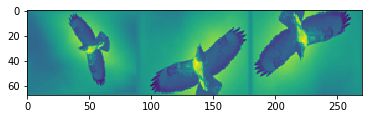

In [8]:
plt.imshow(imgs[:,:,3])

In [9]:
#pictures shown in the given session
#note that there were a total of 7 sessions with those not processed pictures so we're working with around 1/7 of our data
#(and 1/32 of our data if we include the processed pictures as well)
istim

array([   2,  250, 1239, ..., 1370, 2204, 2645])

In [10]:
#This is the neurons response to each picture
resp

array([[-1.649236  ,  6.584941  ,  3.1646068 , ..., -1.8458285 ,
        -0.18989399, -1.6860447 ],
       [ 0.33045417, -0.5799008 , -0.519417  , ...,  6.5814443 ,
         0.13272324, -1.2037685 ],
       [ 0.86607665,  2.5381324 , -0.25318283, ...,  3.9718196 ,
        -2.405665  , -1.1123855 ],
       ...,
       [-0.697697  , -1.2418921 , -0.21861576, ..., -0.20757031,
        -1.0013787 , -0.19761944],
       [-0.6290001 , -0.4215197 , -0.47937334, ..., -1.4787686 ,
         0.07557565, -0.4073953 ],
       [-0.21110678, -1.1199663 , -0.36170763, ..., -1.2420301 ,
        -0.42589945, -0.26251554]], dtype=float32)

In [11]:
assert len(resp)==len(istim)

In [12]:
#9476 neurons for each picture
len(resp[0])

9476

In [13]:
#Where the picture we showed earlier was displayed to our mice
np.where(istim==3)

(array([ 851, 1896, 4696], dtype=int64),)

Let's try to add class labels to each picture to make predictions.

In [14]:
label_arr = []
for picture_id in istim:
    pic_class = classes['class_assignment'][0][picture_id]
    label_arr.append(pic_class)

In [15]:
import pandas as pd

In [16]:
resp_as_df = pd.DataFrame(resp)

In [17]:
resp_as_df['label'] = label_arr

In [18]:
resp_as_df

,0,1,2,3,4,5,6,7,8,9,...,9467,9468,9469,9470,9471,9472,9473,9474,9475,label
0,-1.649236,6.584941,3.164607,0.137514,-0.150663,2.997598,0.002563,-1.513178,-0.070760,5.673544,...,2.357814,-0.429651,-0.256065,0.064348,1.859959,-1.645208,-1.845829,-0.189894,-1.686045,1
1,0.330454,-0.579901,-0.519417,-0.772428,-1.977589,2.598670,-0.107773,1.729048,-1.095681,3.551211,...,0.227453,-1.723557,0.212988,-2.141982,-1.092553,4.787362,6.581444,0.132723,-1.203768,2
2,0.866077,2.538132,-0.253183,-0.572803,2.594400,1.639988,-0.186267,-1.335498,0.148630,6.165176,...,-0.688967,0.405629,0.070633,0.895491,-0.479101,-1.029610,3.971820,-2.405665,-1.112386,10
3,-1.419481,-1.057200,0.289960,-0.804035,-0.017608,-0.921944,-0.492534,-0.807318,-1.079327,4.652061,...,-0.578037,0.810017,-0.024975,0.341896,1.495393,-0.976848,2.112235,0.125335,-1.409108,2
4,-1.499224,-1.249456,-0.442741,-0.650674,0.195505,-0.880547,-0.458469,-1.079546,2.157984,0.359223,...,1.016440,-0.850424,1.818126,1.155880,-0.574788,-0.648809,3.863031,0.102232,-1.245555,9
5,-1.116574,-1.140070,1.275242,-0.263011,-0.232464,4.137464,0.051830,-1.165748,-0.764792,-0.333703,...,0.834086,1.274418,1.595833,0.935034,-0.409800,0.443032,3.644560,0.134741,-0.993130,6
6,2.824217,-0.128366,-0.185334,2.403765,-1.350308,0.545205,0.218300,-1.126185,1.378951,3.722174,...,-0.519744,-0.049996,-0.119520,0.658943,-1.064538,-1.679127,5.258021,1.522998,-0.783025,1
7,-0.597882,-0.066794,-0.524262,-0.556648,-1.077241,1.459061,0.251158,-1.165117,-1.185127,0.403476,...,2.835917,1.255375,1.172298,-1.542515,-0.908102,1.400765,-0.329947,3.792436,-0.907948,4
8,1.727961,1.671838,-0.203324,-1.004355,-1.724133,-0.312320,0.145596,0.441316,-1.330832,-0.127489,...,0.793758,1.675307,0.102236,0.654770,0.856355,-1.101082,2.562332,-1.671879,-1.810018,6
9,1.936532,16.913218,1.252451,-0.096978,-1.651055,-0.865998,0.012213,-1.035446,-0.903042,5.681929,...,-1.847632,-0.753538,-0.785481,-1.182759,0.778964,-0.399563,-0.232303,-0.289858,-2.338141,4


Let's train a linear classifier on the data and test it (using a 85-15 train-test split). The fitting can take some time because there is a lot of data.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(resp_as_df.drop('label',axis=1), resp_as_df['label'], test_size=0.15, random_state=0)

In [20]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
preds = svc.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(preds,y_test))

0.2768304914744233


In [23]:
from sklearn.metrics import confusion_matrix

In [27]:
y_test.value_counts()

7     147
8     139
0     124
2     120
6     115
1     112
4      91
11     47
3      39
9      33
10     17
5      13
Name: label, dtype: int64

In [30]:
147/len(y_test)

0.14744232698094284

In [25]:
confusion_matrix(y_test,preds)

array([[38, 13, 15,  7, 10,  0,  7,  6, 18,  5,  0,  5],
       [15, 56,  7,  3,  6,  0, 10,  3,  9,  2,  0,  1],
       [18, 12, 32,  3, 13,  1, 11, 15, 12,  1,  0,  2],
       [ 2,  1,  8,  4,  7,  0,  5,  3,  5,  1,  0,  3],
       [17,  5, 13,  2, 29,  0,  3, 15,  6,  0,  0,  1],
       [ 4,  0,  0,  1,  0,  3,  1,  1,  2,  1,  0,  0],
       [13, 21, 13,  2,  5,  1, 25, 11, 13,  2,  1,  8],
       [23, 14, 14,  3, 15,  2, 10, 37, 20,  2,  2,  5],
       [22, 11, 19,  3,  9,  0,  6, 21, 39,  2,  0,  7],
       [ 6,  4,  2,  1,  2,  0,  2,  2,  6,  6,  1,  1],
       [ 1,  0,  3,  0,  0,  1,  0,  3,  4,  0,  5,  0],
       [ 9,  4,  5,  1,  7,  0,  4,  4,  9,  1,  1,  2]], dtype=int64)

The classifier is clearly better than just predicting majority class so this works as a good baseline